In [1]:
import os
import random
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers as tfl
from PIL import Image
from keras.models import Sequential
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout

First we will load the necessary data

In [2]:
data_dir = 'Processed Data'

X_train = np.load(os.path.join(data_dir, 'X_train.npy'))
X_test = np.load(os.path.join(data_dir, 'X_test.npy'))
Y_train = np.load(os.path.join(data_dir, 'Y_train.npy'))
Y_test = np.load(os.path.join(data_dir, 'Y_test.npy'))

In [3]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {X_train.shape}")

Shape of X_train: (7185, 224, 224, 3)
Shape of Y_train: (7185, 3)
Shape of X_test: (1797, 224, 224, 3)
Shape of Y_test: (7185, 224, 224, 3)


# MobileNet V2

MobileNetV2 is a convolutional neural network architecture designed for efficient mobile and embedded vision applications. Developed by Google researchers, it is a successor to the original MobileNet model, with improved performance and efficiency. 

The key idea behind MobileNetV2 is the use of an inverted residual structure, where the input and output of the residual block have thin bottleneck layers, and the middle layer is expanded to a higher dimension. This design allows for efficient computation while maintaining representational power.

MobileNetV2 also incorporates two new features:

1. Linear bottlenecks: The input and output of the residual blocks are connected using linear bottleneck layers, improving information flow and reducing computation cost.

2. Shortcut connections: Shortcut connections between the bottlenecks and the expanded layers enable faster training and better performance.

Overall, MobileNetV2 achieves higher accuracy than its predecessor while being more computationally efficient, making it well-suited for real-time applications on mobile and embedded devices with limited computational resources.

The diagram below represents the architecture of MobileNetV2


![MobileNetV2 Architecture](assets/mobilenetv2.png)
MobileNetV2 Architecture Diagram Source: [Matthijs Hollemans](https://machinethink.net/blog/mobilenet-v2/)

In [4]:
base_model = MobileNetV2(weights='imagenet', include_top=False)
base_model.trainable = False

input_layer = Input(shape=(224, 224, 3))

x = base_model(input_layer)

x = GlobalAveragePooling2D()(x)

output_layer = Dense(3, activation='softmax')(x)  

model_1 = Model(inputs=input_layer, outputs=output_layer)

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_1.summary()

C:\Users\plati\AppData\Local\Temp\ipykernel_14648\2599446116.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │           3,843 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Now that we have defined the architecture of the model, we will train it.

It is important to note that only the last output layer we have created and added at the end of the MobileNet model is trainable since all the other have been frozen.

In [5]:
history1 = model_1.fit(X_train, Y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 72s 382ms/step - accuracy: 0.7995 - loss: 0.4783 - val_accuracy: 0.9450 - val_loss: 0.1567
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 48s 267ms/step - accuracy: 0.9534 - loss: 0.1455 - val_accuracy: 0.9527 - val_loss: 0.1254
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 48s 267ms/step - accuracy: 0.9667 - loss: 0.1026 - val_accuracy: 0.9596 - val_loss: 0.1107
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 48s 266ms/step - accuracy: 0.9754 - loss: 0.0791 - val_accuracy: 0.9631 - val_loss: 0.1012
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 49s 270ms/step - accuracy: 0.9817 - loss: 0.0665 - val_accuracy: 0.9694 - val_loss: 0.0889
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 48s 267ms/step - accuracy: 0.9842 - loss: 0.0567 - val_accuracy: 0.9708 - val_loss: 0.0841
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 48s 268ms/step - accuracy: 0.9824 - loss: 0.0553 - val_accuracy: 0.9708 - val_loss: 0.0814
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 48s 267ms/step - accuracy: 0.9870 - loss: 0

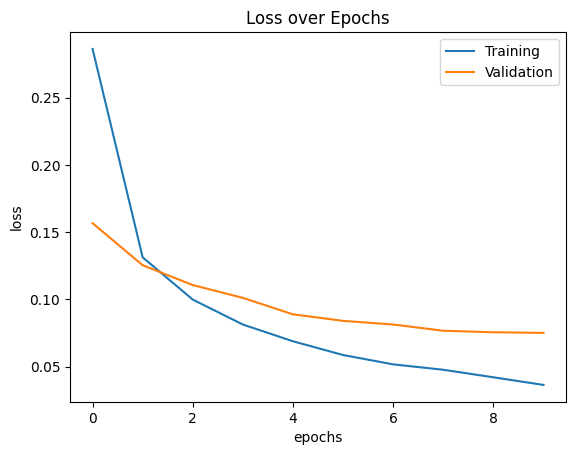

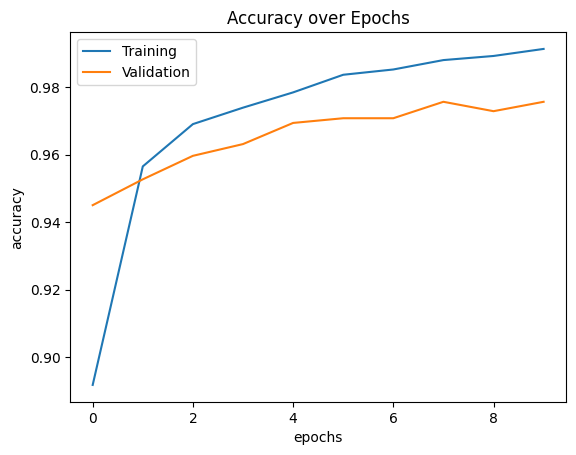

In [6]:
history = history1.history

loss = []
val_loss = []
acc = []
val_acc = []

loss = history["loss"]
val_loss = history["val_loss"]

acc = history["accuracy"]
val_acc = history["val_accuracy"]

plt.plot(loss, label="Training")
plt.plot(val_loss, label="Validation")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss over Epochs")
plt.show()

plt.plot(acc, label="Training")
plt.plot(val_acc, label="Validation")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy over Epochs")
plt.show()

In [7]:
Y_predicted = model_1.predict(X_test)
accuracy = accuracy_score(np.argmax(Y_test, axis=1), np.argmax(Y_predicted, axis=1))
print(f'Accuracy: {accuracy}')

57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 222ms/step
Accuracy: 0.9755147468002225


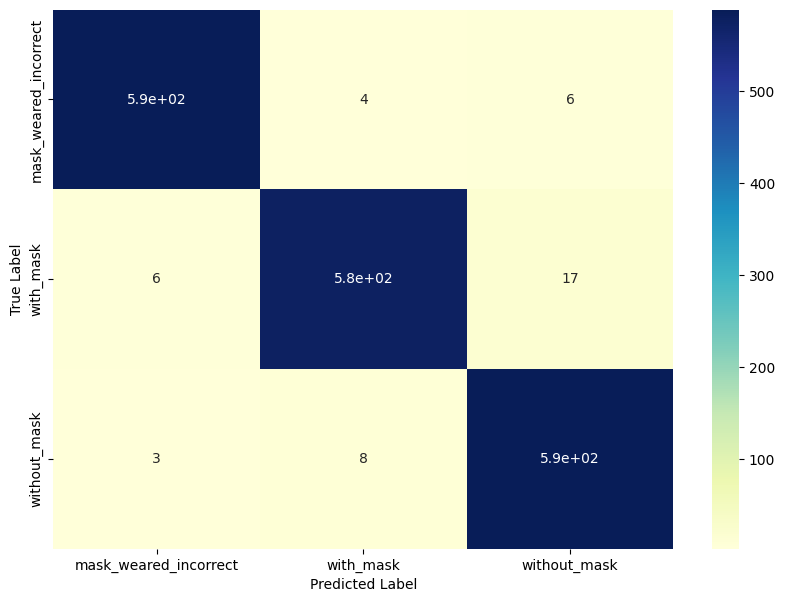

In [8]:
Y_true_labels = np.argmax(Y_test, axis=1)
Y_pred_labels = np.argmax(Y_predicted, axis=1)

label_list = ['mask_weared_incorrect', 'with_mask', 'without_mask']

plt.subplots(figsize=(10, 7))
cm = confusion_matrix(Y_true_labels, Y_pred_labels, )
sns.heatmap(cm, annot = True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[9.9989009e-01 1.5601803e-05 9.4334500e-05]
 [3.3485161e-05 9.9759197e-01 2.3746188e-03]
 [1.8747326e-04 9.9664152e-01 3.1710719e-03]]


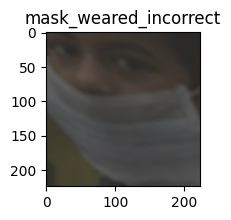

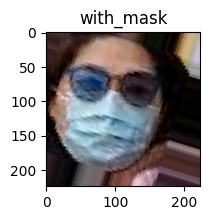

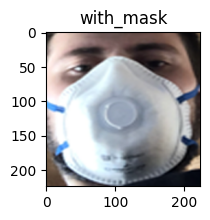

In [9]:
X = X_train
test_images = np.array([X[random.randint(0, X.shape[0] - 1)], X[random.randint(0, X.shape[0] - 1)], X[random.randint(0, X.shape[0] - 1)]])

y_test_pred = model_1.predict(test_images)
y_test_pred_ = np.argmax(y_test_pred, axis=1)
print(y_test_pred)

label_list = ['mask_weared_incorrect', 'with_mask', 'without_mask']

y_pred_labels = [label_list[i] for i in y_test_pred_]

i = 0
for image in test_images:
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.title(y_pred_labels[i])
    plt.show()
    i = i + 1

In [10]:
# Saving the fitted model 
models_dir = 'Models'

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

model_file_path = os.path.join(models_dir, 'mn_modelv1.keras')
model_1.save(model_file_path)

The initial performance of the model is pretty good as it is able to chieve an accuracy of 97.55% on the test set. Now we will tinker with the model architecture first by adding and three new layers to the model, one being a dense layers and the other two being dropout layers.

In [4]:
base_model = MobileNetV2(weights='imagenet', include_top=False)

base_model.trainable = False

input_layer = Input(shape=(224, 224, 3))
x = base_model(input_layer)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(12, activation="relu")(x)
x = Dropout(0.4)(x)
output_layer = Dense(3, activation='softmax')(x)
model_1v2 = Model(inputs=input_layer, outputs=output_layer)

model_1v2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_1v2.summary()

C:\Users\plati\AppData\Local\Temp\ipykernel_6948\988965050.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 12)                  │          15,372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              39 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,273,395 (8.67 MB)

 Trainable params: 15,411 (60.20 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
history1 = model_1v2.fit(X_train, Y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 122s 627ms/step - accuracy: 0.6773 - loss: 0.7234 - val_accuracy: 0.9221 - val_loss: 0.2082
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 88s 490ms/step - accuracy: 0.8539 - loss: 0.3590 - val_accuracy: 0.9443 - val_loss: 0.1596
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 90s 498ms/step - accuracy: 0.8944 - loss: 0.2841 - val_accuracy: 0.9478 - val_loss: 0.1484
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 88s 488ms/step - accuracy: 0.8984 - loss: 0.2512 - val_accuracy: 0.9513 - val_loss: 0.1290
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 88s 490ms/step - accuracy: 0.9097 - loss: 0.2348 - val_accuracy: 0.9506 - val_loss: 0.1293
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 89s 497ms/step - accuracy: 0.9158 - loss: 0.2173 - val_accuracy: 0.9603 - val_loss: 0.1153
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 91s 507ms/step - accuracy: 0.9190 - loss: 0.2129 - val_accuracy: 0.9513 - val_loss: 0.1221
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 91s 504ms/step - accuracy: 0.9214 - loss: 

In [6]:
history2 = model_1v2.fit(X_train, Y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 110s 601ms/step - accuracy: 0.9161 - loss: 0.2033 - val_accuracy: 0.9617 - val_loss: 0.1000
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 89s 492ms/step - accuracy: 0.9247 - loss: 0.1952 - val_accuracy: 0.9617 - val_loss: 0.1074
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 88s 488ms/step - accuracy: 0.9200 - loss: 0.1932 - val_accuracy: 0.9659 - val_loss: 0.1006
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 90s 498ms/step - accuracy: 0.9228 - loss: 0.1901 - val_accuracy: 0.9652 - val_loss: 0.1001
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 91s 503ms/step - accuracy: 0.9249 - loss: 0.1884 - val_accuracy: 0.9610 - val_loss: 0.0987
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 91s 505ms/step - accuracy: 0.9304 - loss: 0.1815 - val_accuracy: 0.9638 - val_loss: 0.0982
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 90s 502ms/step - accuracy: 0.9385 - loss: 0.1671 - val_accuracy: 0.9582 - val_loss: 0.1050
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 91s 505ms/step - accuracy: 0.9330 - loss: 

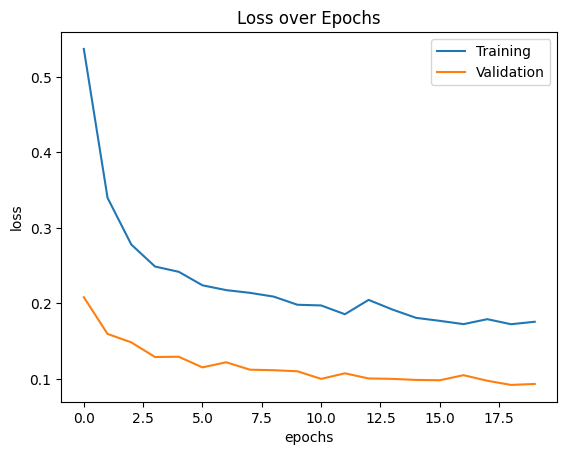

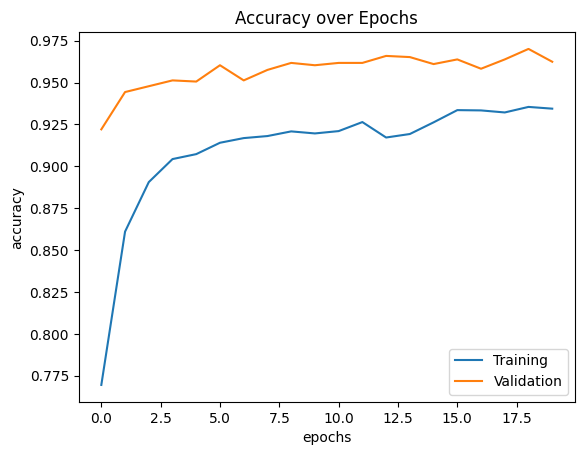

In [7]:
history1 = history1.history
history2 = history2.history

loss = []
val_loss = []
acc = []
val_acc = []

loss = history1["loss"] + history2["loss"]
val_loss = history1["val_loss"] + history2["val_loss"]

acc = history1["accuracy"] + history2["accuracy"]
val_acc = history1["val_accuracy"] + history2["val_accuracy"]

plt.plot(loss, label="Training")
plt.plot(val_loss, label="Validation")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss over Epochs")
plt.show()

plt.plot(acc, label="Training")
plt.plot(val_acc, label="Validation")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy over Epochs")
plt.show()

In [8]:
Y_predicted = model_1v2.predict(X_test)
accuracy = accuracy_score(np.argmax(Y_test, axis=1), np.argmax(Y_predicted, axis=1))
print(f'Accuracy: {accuracy}')

57/57 ━━━━━━━━━━━━━━━━━━━━ 28s 442ms/step
Accuracy: 0.9677239844184753


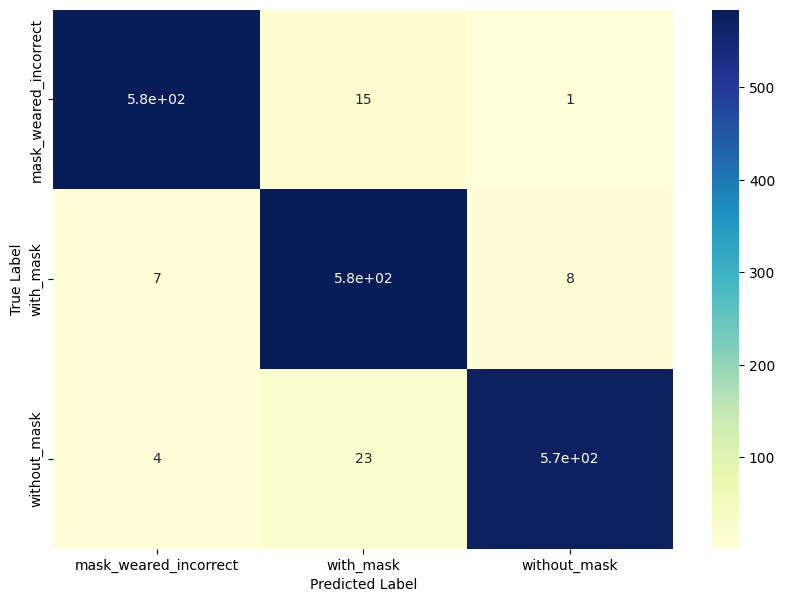

In [9]:
Y_true_labels = np.argmax(Y_test, axis=1)
Y_pred_labels = np.argmax(Y_predicted, axis=1)

label_list = ['mask_weared_incorrect', 'with_mask', 'without_mask']

plt.subplots(figsize=(10, 7))
cm = confusion_matrix(Y_true_labels, Y_pred_labels, )
sns.heatmap(cm, annot = True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
[[2.1458159e-03 9.9179053e-01 6.0636536e-03]
 [3.4624467e-12 1.2170589e-09 1.0000000e+00]
 [7.3306968e-05 9.9905449e-01 8.7225204e-04]]


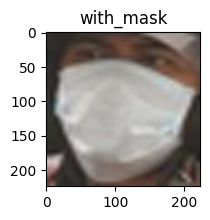

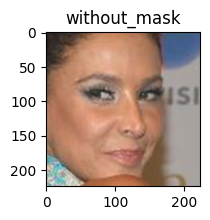

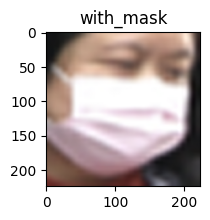

In [11]:
X = X_train
test_images = np.array([X[random.randint(0, X.shape[0] - 1)], X[random.randint(0, X.shape[0] - 1)], X[random.randint(0, X.shape[0] - 1)]])

y_test_pred = model_1v2.predict(test_images)
y_test_pred_ = np.argmax(y_test_pred, axis=1)
print(y_test_pred)

label_list = ['mask_weared_incorrect', 'with_mask', 'without_mask']

y_pred_labels = [label_list[i] for i in y_test_pred_]

i = 0
for image in test_images:
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.title(y_pred_labels[i])
    plt.show()
    i = i + 1

In [12]:
# Saving the fitted model 
models_dir = 'Models'

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

model_file_path = os.path.join(models_dir, 'mn_modelv2.keras')
model_1v2.save(model_file_path)

To allow the model to better understand the dataset and allow for better feature understanding, the last two blocks in the model have been unfrozen and set as trainable allowing them to update their weights. 

In [20]:
base_model = MobileNetV2(weights='imagenet', include_top=False)

base_model.trainable = False

for layer in base_model.layers[-18:]:
    layer.trainable = True

input_layer = Input(shape=(224, 224, 3))
x = base_model(input_layer)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(12, activation="relu")(x)
x = Dropout(0.4)(x)
output_layer = Dense(3, activation='softmax')(x)
model_1v3 = Model(inputs=input_layer, outputs=output_layer)

model_1v3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_1v3.summary()

C:\Users\plati\AppData\Local\Temp\ipykernel_6948\3515873880.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 12)                  │          15,372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              39 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,273,395 (8.67 MB)

 Trainable params: 1,065,971 (4.07 MB)

 Non-trainable params: 1,207,424 (4.61 MB)

In [21]:
print("Unfrozen Layers in the model: ")
for layer in base_model.layers:
    if(layer.trainable):
        print(layer.name)

Unfrozen Layers in the model: 
block_15_expand_relu
block_15_depthwise
block_15_depthwise_BN
block_15_depthwise_relu
block_15_project
block_15_project_BN
block_15_add
block_16_expand
block_16_expand_BN
block_16_expand_relu
block_16_depthwise
block_16_depthwise_BN
block_16_depthwise_relu
block_16_project
block_16_project_BN
Conv_1
Conv_1_bn
out_relu


In [22]:
history1 = model_1v3.fit(X_train, Y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 76s 384ms/step - accuracy: 0.8269 - loss: 0.4093 - val_accuracy: 0.3271 - val_loss: 32.9566
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 56s 310ms/step - accuracy: 0.9604 - loss: 0.1311 - val_accuracy: 0.6207 - val_loss: 25.3459
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 54s 301ms/step - accuracy: 0.9791 - loss: 0.0864 - val_accuracy: 0.6416 - val_loss: 10.5586
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 54s 302ms/step - accuracy: 0.9705 - loss: 0.1148 - val_accuracy: 0.6305 - val_loss: 17.8347
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 54s 302ms/step - accuracy: 0.9760 - loss: 0.0859 - val_accuracy: 0.6138 - val_loss: 24.2897
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 55s 304ms/step - accuracy: 0.9818 - loss: 0.0676 - val_accuracy: 0.6312 - val_loss: 21.3549
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 56s 311ms/step - accuracy: 0.9855 - loss: 0.0543 - val_accuracy: 0.6256 - val_loss: 25.8245
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 54s 301ms/step - accuracy: 0.9865 - 

In [23]:
history2 = model_1v3.fit(X_train, Y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 70s 385ms/step - accuracy: 0.9851 - loss: 0.0457 - val_accuracy: 0.5846 - val_loss: 6.4764
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 55s 303ms/step - accuracy: 0.9814 - loss: 0.0756 - val_accuracy: 0.9102 - val_loss: 1.2075
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 54s 299ms/step - accuracy: 0.9924 - loss: 0.0305 - val_accuracy: 0.8900 - val_loss: 1.8493
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 54s 301ms/step - accuracy: 0.9858 - loss: 0.0426 - val_accuracy: 0.8949 - val_loss: 1.6014
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 54s 300ms/step - accuracy: 0.9863 - loss: 0.0443 - val_accuracy: 0.9631 - val_loss: 0.4405
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 54s 300ms/step - accuracy: 0.9934 - loss: 0.0293 - val_accuracy: 0.9151 - val_loss: 1.4603
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 54s 301ms/step - accuracy: 0.9867 - loss: 0.0375 - val_accuracy: 0.9812 - val_loss: 0.1639
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 55s 304ms/step - accuracy: 0.9903 - loss: 0

In [24]:
history3 = model_1v3.fit(X_train, Y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 63s 351ms/step - accuracy: 0.9885 - loss: 0.0318 - val_accuracy: 0.9812 - val_loss: 0.0928
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 54s 302ms/step - accuracy: 0.9891 - loss: 0.0339 - val_accuracy: 0.9645 - val_loss: 0.3186
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 53s 297ms/step - accuracy: 0.9907 - loss: 0.0284 - val_accuracy: 0.9930 - val_loss: 0.0359
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 53s 296ms/step - accuracy: 0.9878 - loss: 0.0470 - val_accuracy: 0.9826 - val_loss: 0.0961
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 53s 297ms/step - accuracy: 0.9928 - loss: 0.0270 - val_accuracy: 0.9840 - val_loss: 0.0729
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 53s 297ms/step - accuracy: 0.9898 - loss: 0.0317 - val_accuracy: 0.9687 - val_loss: 0.1691
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 53s 297ms/step - accuracy: 0.9884 - loss: 0.0411 - val_accuracy: 0.9673 - val_loss: 0.1479
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 53s 297ms/step - accuracy: 0.9880 - loss: 0

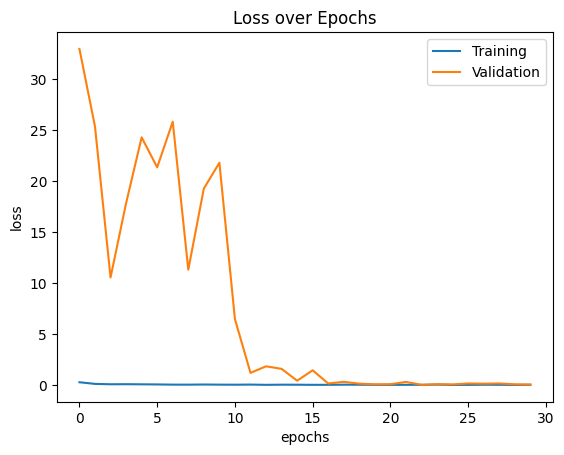

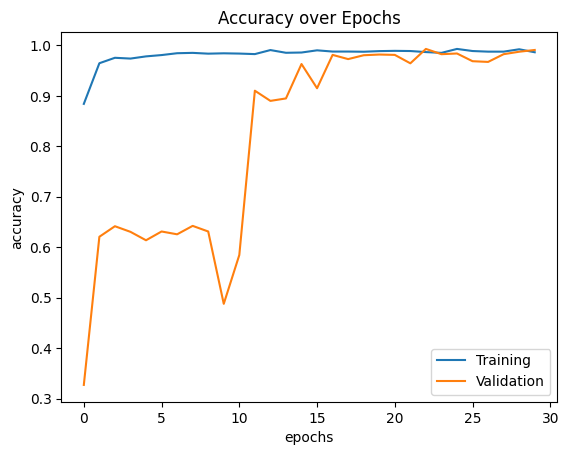

In [25]:
loss = []
val_loss = []
acc = []
val_acc= []

for i in range(1,4):
    his = eval(f'history{i}.history')
    loss += his["loss"]
    val_loss += his["val_loss"]
    
    acc += his["accuracy"]
    val_acc += his["val_accuracy"]

plt.plot(loss, label="Training")
plt.plot(val_loss, label="Validation")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss over Epochs")
plt.show()

plt.plot(acc, label="Training")
plt.plot(val_acc, label="Validation")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy over Epochs")
plt.show()

In [26]:
Y_predicted = model_1v3.predict(X_test)
accuracy = accuracy_score(np.argmax(Y_test, axis=1), np.argmax(Y_predicted, axis=1))
print(f'Accuracy: {accuracy}')

57/57 ━━━━━━━━━━━━━━━━━━━━ 13s 218ms/step
Accuracy: 0.9805230940456316


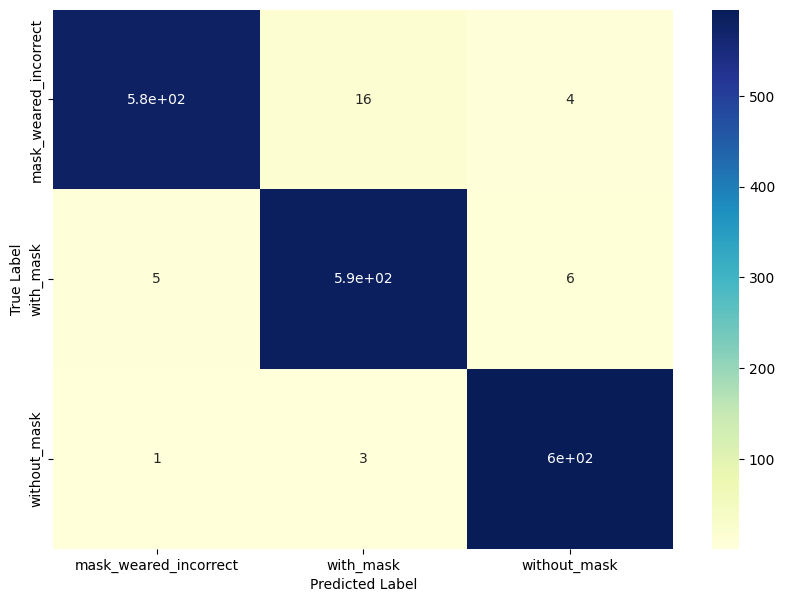

In [27]:
Y_true_labels = np.argmax(Y_test, axis=1)
Y_pred_labels = np.argmax(Y_predicted, axis=1)

label_list = ['mask_weared_incorrect', 'with_mask', 'without_mask']

plt.subplots(figsize=(10, 7))
cm = confusion_matrix(Y_true_labels, Y_pred_labels, )
sns.heatmap(cm, annot = True, xticklabels=label_list, yticklabels=label_list, cmap="YlGnBu")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.0000000e+00 5.7880030e-22 1.0000000e+00]
 [0.0000000e+00 8.4132414e-30 1.0000000e+00]
 [9.9967992e-01 3.2010020e-04 1.6019262e-08]]


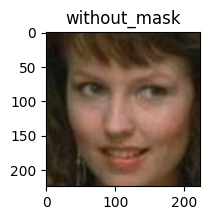

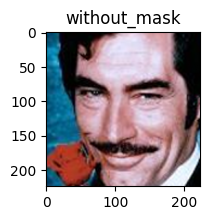

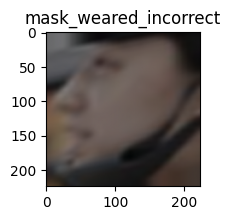

In [29]:
X = X_train
test_images = np.array([X[random.randint(0, X.shape[0] - 1)], X[random.randint(0, X.shape[0] - 1)], X[random.randint(0, X.shape[0] - 1)]])

y_test_pred = model_1v3.predict(test_images)
y_test_pred_ = np.argmax(y_test_pred, axis=1)
print(y_test_pred)

label_list = ['mask_weared_incorrect', 'with_mask', 'without_mask']

y_pred_labels = [label_list[i] for i in y_test_pred_]

i = 0
for image in test_images:
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.title(y_pred_labels[i])
    plt.show()
    i = i + 1

In [30]:
# Saving the fitted model 
models_dir = 'Models'

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

model_file_path = os.path.join(models_dir, 'mn_modelv3.keras')
model_1v3.save(model_file_path)

After the modifications were applied and the model was trained on the dataset, it achieved an accuracy of 98.05% on the test set. This is a decent improve in performance than earlier and just goes to show how powerful transfer learning is.